Part 1 - Load and Validate the Data

Part 2 - Joining (Merging) Dataframes

Part 3 - Data Exploration

Part 4 - Visualizations


# **Part I - Load and Validate the Data**

*  Load the data as a pandas data frame.
*  Validate that it has the appropriate number of observations (checking the       raw file, and also read the dataset description from data.world [MovieLens](https://grouplens.org/datasets/movielens/latest/) ).

In [128]:
"""
Import Statments:
"""

#classics
import pandas as pd
import os

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [3]:
pwd

'/Users/jorge/CS-Data-Science-Build-Week-1'

In [35]:
ls

Data/               README.md           notebooks/
LICENSE             application.py      predict_test.ipynb


## Reading Movies & Ratings data:

In [52]:
data_path = '/Users/jorge/CS-Data-Science-Build-Week-1/data'
movies_path = '/Users/jorge/CS-Data-Science-Build-Week-1/data/movies.csv'
ratings_path = '/Users/jorge/CS-Data-Science-Build-Week-1/data/ratings.csv'
movies = pd.read_csv(
    os.path.join(data_path, movies_path),
    usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})
ratings = pd.read_csv(
    os.path.join(data_path, ratings_path),
    usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

## Movies

In [53]:
print(movies.shape)
movies.head()


(9742, 2)


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


## Ratings

In [54]:
print(ratings.shape)
ratings.head()

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# **Part II - Joining (Merging) Dataframes**

*  movies: shows information about movies, namely a unique movieID
*  ratings: shows the rating that a particular userID gave to a particular movieID
*  This was accomplished by "joining" (or "merging") the DataFrames using the Pandas merge function:

In [114]:
movies.columns

Index(['movieId', 'title'], dtype='object')

In [56]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [73]:
df = pd.merge(movies, ratings)
df.columns

Index(['movieId', 'title', 'userId', 'rating'], dtype='object')

In [74]:
print(df.shape)
df.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [75]:
print(movies.shape)
print(ratings.shape)
print(df.shape)

(9742, 2)
(100836, 3)
(100836, 4)


# **Part III - Data Exploration**


In [116]:
df.dtypes

movieId      int32
title       object
userId       int32
rating     float32
dtype: object

In [105]:
# Here we can see the breakdown of the count, mean, std, min, and percentile by 25%,50%,75%
df.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


In [117]:
# A great way to get an overview of our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
movieId    100836 non-null int32
title      100836 non-null object
userId     100836 non-null int32
rating     100836 non-null float32
dtypes: float32(1), int32(2), object(1)
memory usage: 5.2+ MB


In [109]:
df['title'].value_counts().head()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64

In [119]:
# nulls as missing values. 
# We'll subset our data by choosing ALL the rows that have missing values.

print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


0

In [79]:
print(df.nunique())

movieId    9724
title      9719
userId      610
rating       10
dtype: int64


In [121]:
# Here we are verifing the amount of content in this Netflix dataset 
print('The number of titles in this dataset:',df['title'].nunique())

The number of titles in this dataset: 9719


## EDA

In [76]:
print("Numerical describe of distribuition title")
print(df.groupby("title")["rating"].count())
print("Percentage of distribuition Type ")
print((df.groupby("title")["rating"].count() / len(df.title) * 100).round(decimals=2))

Numerical describe of distribuition title
title
'71 (2014)                                                                                   1
'Hellboy': The Seeds of Creation (2004)                                                      1
'Round Midnight (1986)                                                                       2
'Salem's Lot (2004)                                                                          1
'Til There Was You (1997)                                                                    2
'Tis the Season for Love (2015)                                                              1
'burbs, The (1989)                                                                          17
'night Mother (1986)                                                                         1
(500) Days of Summer (2009)                                                                 42
*batteries not included (1987)                                                               7
..

# **Part IV - Visualizations**

Top 10 Rating by user
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


Text(0.5, 0, 'Rating')

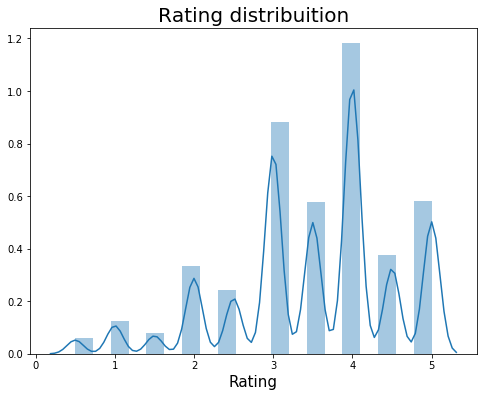

In [104]:
print("Top 10 Rating by user")
print(df["rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
g = sns.distplot(df["rating"], bins=20)
g.set_title("Rating distribuition", size = 20)
g.set_xlabel('Rating', fontsize=15)

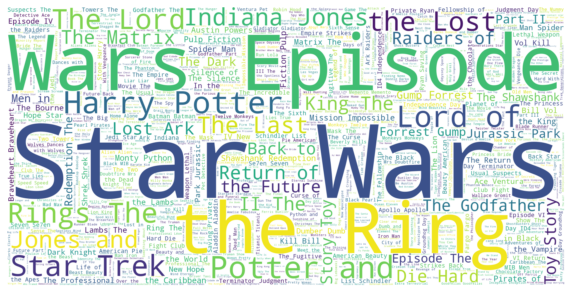

In [124]:
# Here we learned to make a word cloud!
# We used the 'title' to see and help if the ratings meet the demand within
# The MovieLens library. Max out 1000 words..
# This graph is in the blog.
# Here are the most popular shows: 

plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white",width=2000,height=1000).generate(" ".join(df['title']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

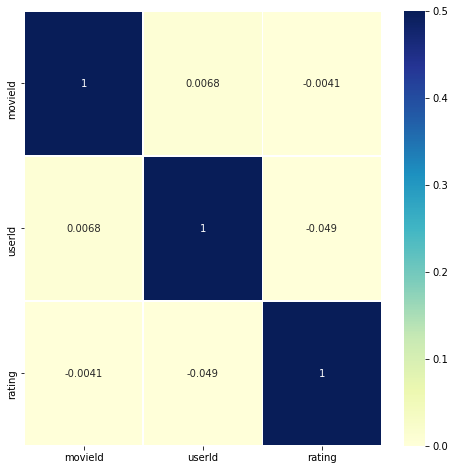

In [125]:
# This did not make the cut for blog post.
# Heatmap of all of the dataframe via df.corr()
# This was a test to see if I can make a heatmap
# after watching a video or two this was the outcome:
%matplotlib inline

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot =True, linewidth=0.5,cmap='YlGnBu',vmin=0, vmax=0.5)
plt.show()